# Remaining dissertation code

In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re

In [23]:
data=pd.read_csv("output.csv")

In [24]:
data

,Chief Complaint,Predict,Consensus
0,"""been feeling bad"" last 2 weeks & switched BP ...",N,-
1,"""can't walk"", reports onset at <<TIME>>. orien...",Y,N
2,"""dehydration"" Chest hurts, hips hurt, cramps P...",Y,Y
3,"""gout flare up"" L arm swelling x 1 week. denie...",Y,Y
4,"""heart racing,""dyspnea, and orthopnea that has...",N,-
...,...,...,...
8432,"stepped on a nail at home with right foot, pai...",N,N
8433,""" I was having a breakdown."" R/T stress and de...",N,-
8434,"""I tried to jump in front of a car"" Pt states ...",N,-
8435,Abdominal pain x 1 week. Denies PMH,N,-


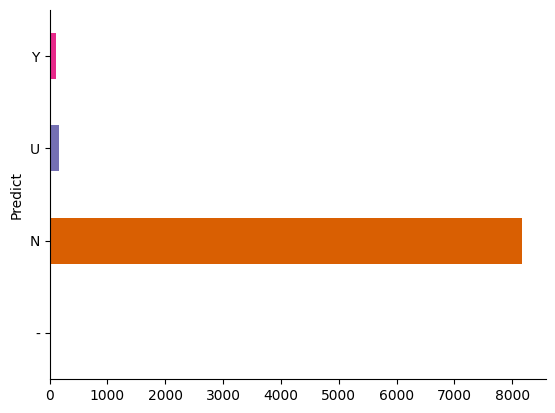

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Predict').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
data = data[data['Predict'].isin(['Y', 'N'])]


In [8]:
# Function to preprocess text
def preprocess_text(text):
    # Remove characters like << and >>
    text = re.sub(r'<<[^<>]+>>', '', text)
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.lower())
    return text

In [9]:
data['Chief Complaint'] = data['Chief Complaint'].apply(preprocess_text)


<ipython-input-9-31c6df8d8298>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Chief Complaint'] = data['Chief Complaint'].apply(preprocess_text)


In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
from typing_extensions import dataclass_transform
# Remove stopwords
stop_words = set(stopwords.words('english'))
data['Chief Complaint'] = data['Chief Complaint'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in stop_words)
)


<ipython-input-11-7a8e7a36055a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Chief Complaint'] = data['Chief Complaint'].apply(


In [12]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [13]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [14]:
# Tokenize text and apply lemmatization
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [15]:
def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(lemmatized_tokens)


In [16]:
# Apply lemmatization to the 'Chief Complaint' column
data['Chief Complaint'] = data['Chief Complaint'].apply(lemmatize_text)

<ipython-input-16-ffaa4c145bdd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Chief Complaint'] = data['Chief Complaint'].apply(lemmatize_text)


In [17]:
# applying tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Chief Complaint'])

# Create DataFrame for TF-IDF
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=data.index)


In [18]:
# N-grams (bigrams) Vectorization
ngram_vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2))  # Considering bigrams
ngram_matrix = ngram_vectorizer.fit_transform(data['Chief Complaint'])

# Create a DataFrame for N-grams representation
ngram_df = pd.DataFrame(ngram_matrix.toarray(), columns=ngram_vectorizer.get_feature_names_out())
ngram_df = pd.concat([data[['Predict', 'Consensus']], ngram_df], axis=1)


In [19]:
ngram_df


,Predict,Consensus,0008 today,0017 come,0018 use,0028 speech,0034 neighbor,0036 associated,0042 today,0049 pressure,...,zoned difficulty,zpac prednisone,zpack copd,zpack left,zpak cough,zquil 0104,zyprexa state,zyrtec didnt,zyrtec left,zyrtecd yesterday
0,N,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Y,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Y,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Y,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,N,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7981,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7982,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8011,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8015,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# feature engineering

In [26]:

df=data


# Function to count special characters in a given text
def count_special_chars(text):
    special_chars = re.findall(r'[^A-Za-z0-9\s]', text)
    return len(special_chars)

# Applying feature engineering
df['Text_Length'] = df.apply(lambda row: len(row['Chief Complaint']), axis=1)
df['Special_Char_Count'] = df.apply(lambda row: count_special_chars(row['Chief Complaint']), axis=1)

# Grouping by 'Predict' column and calculating mean text length and special character count
grouped = df.groupby('Predict').agg({'Text_Length': 'mean', 'Special_Char_Count': 'mean'}).reset_index()

print("Feature Engineering Results:")
print(grouped)



Feature Engineering Results:
  Predict  Text_Length  Special_Char_Count
0       -    92.500000            1.500000
1       N   108.279383            5.138590
2       U   105.115385            5.314103
3       Y    99.243243            6.153153


In [27]:
# Word Count
df['Word_Count'] = df['Chief Complaint'].apply(lambda x: len(x.split()))

# Average Word Length
df['Avg_Word_Length'] = df['Chief Complaint'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()) if len(x.split()) > 0 else 0)

# Presence of Specific Keywords or Phrases
df['Has_Gout_Term'] = df['Chief Complaint'].apply(lambda x: 1 if 'gout' in x.lower() else 0)
df['Has_Dehydration_Term'] = df['Chief Complaint'].apply(lambda x: 1 if 'dehydration' in x.lower() else 0)

# Capitalization Ratio
df['Capitalization_Ratio'] = df['Chief Complaint'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x) if len(x) > 0 else 0)

# Numerical Digits Count
df['Numerical_Digits_Count'] = df['Chief Complaint'].apply(lambda x: sum(1 for c in x if c.isdigit()))

# Sentence Count
df['Sentence_Count'] = df['Chief Complaint'].apply(lambda x: len(re.split(r'[.!?]+', x)))

# Display the modified DataFrame
print(df)


                                        Chief Complaint Predict Consensus  \
0     "been feeling bad" last 2 weeks & switched BP ...       N         -   
1     "can't walk", reports onset at <<TIME>>. orien...       Y         N   
2     "dehydration" Chest hurts, hips hurt, cramps P...       Y         Y   
3     "gout flare up" L arm swelling x 1 week. denie...       Y         Y   
4     "heart racing,"dyspnea, and orthopnea that has...       N         -   
...                                                 ...     ...       ...   
8432  stepped on a nail at home with right foot, pai...       N         N   
8433  " I was having a breakdown." R/T stress and de...       N         -   
8434  "I tried to jump in front of a car" Pt states ...       N         -   
8435                Abdominal pain x 1 week. Denies PMH       N         -   
8436  Rash/sores across body, infection ro left thum...       N         N   

      Text_Length  Special_Char_Count  Word_Count  Avg_Word_Length  \
0    

In [28]:
df['Special_Char_Count'] = df.apply(lambda row: count_special_chars(row['Chief Complaint']), axis=1)


In [29]:
df

,Chief Complaint,Predict,Consensus,Text_Length,Special_Char_Count,Word_Count,Avg_Word_Length,Has_Gout_Term,Has_Dehydration_Term,Capitalization_Ratio,Numerical_Digits_Count,Sentence_Count
0,"""been feeling bad"" last 2 weeks & switched BP ...",N,-,122,9,23,4.347826,1,0,0.122951,2,1
1,"""can't walk"", reports onset at <<TIME>>. orien...",Y,N,216,25,33,5.575758,1,0,0.106481,1,4
2,"""dehydration"" Chest hurts, hips hurt, cramps P...",Y,Y,152,8,26,4.884615,1,1,0.032895,0,1
3,"""gout flare up"" L arm swelling x 1 week. denie...",Y,Y,61,3,13,3.769231,1,0,0.016393,1,2
4,"""heart racing,""dyspnea, and orthopnea that has...",N,-,131,12,22,5.000000,1,0,0.068702,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
8432,"stepped on a nail at home with right foot, pai...",N,N,92,3,17,4.411765,0,0,0.010870,0,3
8433,""" I was having a breakdown."" R/T stress and de...",N,-,55,5,10,4.600000,0,0,0.054545,0,3
8434,"""I tried to jump in front of a car"" Pt states ...",N,-,104,4,22,3.772727,0,0,0.048077,0,2
8435,Abdominal pain x 1 week. Denies PMH,N,-,35,1,7,4.142857,0,0,0.142857,1,2


from matplotlib import pyplot as plt
data['Text_Length'].plot(kind='hist', bins=20, title='Text_Length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Special_Char_Count'].plot(kind='hist', bins=20, title='Special_Char_Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Word_Count'].plot(kind='hist', bins=20, title='Word_Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Avg_Word_Length'].plot(kind='hist', bins=20, title='Avg_Word_Length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Predict').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Consensus').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Text_Length', y='Special_Char_Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Special_Char_Count', y='Word_Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Word_Count', y='Avg_Word_Length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Avg_Word_Length', y='Has_Gout_Term', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Text_Length'].plot(kind='line', figsize=(8, 4), title='Text_Length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Special_Char_Count'].plot(kind='line', figsize=(8, 4), title='Special_Char_Count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Word_Count'].plot(kind='line', figsize=(8, 4), title='Word_Count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Avg_Word_Length'].plot(kind='line', figsize=(8, 4), title='Avg_Word_Length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Consensus'].value_counts()
    for x_label, grp in data.groupby('Predict')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Predict')
_ = plt.ylabel('Consensus')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Predict'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Text_Length', y='Predict', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Consensus'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Text_Length', y='Consensus', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Predict'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Special_Char_Count', y='Predict', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Consensus'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Special_Char_Count', y='Consensus', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [30]:
from google.colab import files
csv_filename = 'modified_data.csv'
df.to_csv(csv_filename, index=False)

# continuing with tf -idf only

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report

In [ ]:
X = tfidf_df
y = data['Predict']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

In [ ]:

# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_pred = nb_classifier.predict(X_test)

In [ ]:
# Evaluation metrics for Random Forest Classifier
print("Random Forest Classifier Metrics:")
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='binary', pos_label='Y')
rf_recall = recall_score(y_test, rf_pred, average='binary', pos_label='Y')
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")

# Evaluation metrics for Naive Bayes Classifier
print("\nNaive Bayes Classifier Metrics:")
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred, average='binary', pos_label='Y')
nb_recall = recall_score(y_test, nb_pred, average='binary', pos_label='Y')
print(f"Accuracy: {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")

# Classification report for Random Forest Classifier
print("\nClassification Report - Random Forest Classifier:")
print(classification_report(y_test, rf_pred))

# Classification report for Naive Bayes Classifier
print("\nClassification Report - Naive Bayes Classifier:")
print(classification_report(y_test, nb_pred))

Random Forest Classifier Metrics:
Accuracy: 0.9855
Precision: 0.0000
Recall: 0.0000

Naive Bayes Classifier Metrics:
Accuracy: 0.9855
Precision: 0.0000
Recall: 0.0000

Classification Report - Random Forest Classifier:
              precision    recall  f1-score   support

           N       0.99      1.00      0.99      1632
           Y       0.00      0.00      0.00        24

    accuracy                           0.99      1656
   macro avg       0.49      0.50      0.50      1656
weighted avg       0.97      0.99      0.98      1656


Classification Report - Naive Bayes Classifier:
              precision    recall  f1-score   support

           N       0.99      1.00      0.99      1632
           Y       0.00      0.00      0.00        24

    accuracy                           0.99      1656
   macro avg       0.49      0.50      0.50      1656
weighted avg       0.97      0.99      0.98      1656



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: P

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Encode 'Predict' column to numerical values (0 for 'N', 1 for 'Y')
label_encoder = LabelEncoder()
tfidf_df['Predict'] = label_encoder.fit_transform(data['Predict'])

# Define features (TF-IDF matrix) and target (Predict column)
X = tfidf_df.drop(['Predict'], axis=1)
y = tfidf_df['Predict']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert TF-IDF matrices to numpy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Define a simple neural network model using Keras
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)



Epoch 1/10
187/187 [==============================] - 5s 19ms/step - loss: 0.1246 - accuracy: 0.9864 - val_loss: 0.0416 - val_accuracy: 0.9879
Epoch 2/10
187/187 [==============================] - 3s 17ms/step - loss: 0.0285 - accuracy: 0.9867 - val_loss: 0.0249 - val_accuracy: 0.9879
Epoch 3/10
187/187 [==============================] - 3s 17ms/step - loss: 0.0142 - accuracy: 0.9923 - val_loss: 0.0257 - val_accuracy: 0.9925
Epoch 4/10
187/187 [==============================] - 4s 22ms/step - loss: 0.0068 - accuracy: 0.9977 - val_loss: 0.0239 - val_accuracy: 0.9925
Epoch 5/10
187/187 [==============================] - 3s 16ms/step - loss: 0.0023 - accuracy: 0.9997 - val_loss: 0.0345 - val_accuracy: 0.9925
Epoch 6/10
187/187 [==============================] - 3s 16ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0364 - val_accuracy: 0.9925
Epoch 7/10
187/187 [==============================] - 3s 16ms/step - loss: 5.3053e-04 - accuracy: 1.0000 - val_loss: 0.0398 - val_accuracy: 0.

AttributeError: ignored

In [ ]:
# Evaluate the model on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Thresholding probabilities to obtain classes

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

52/52 [==============================] - 1s 14ms/step
Accuracy: 0.9921
Precision: 1.0000
Recall: 0.4583


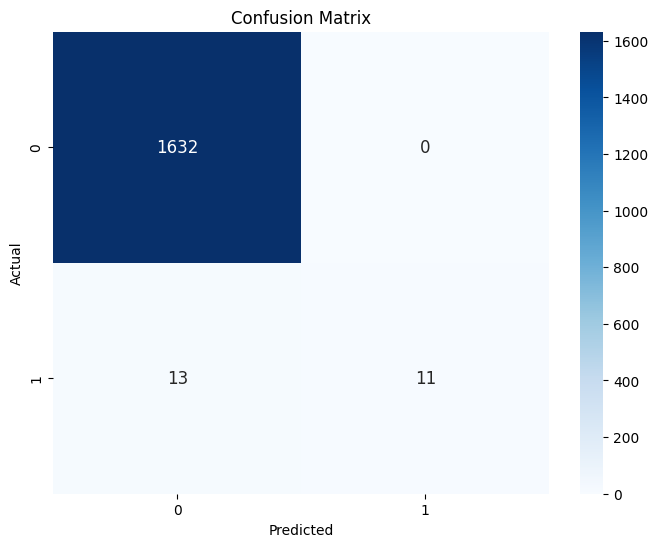

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# using the column consensus as a predictor


In [ ]:
data=pd.read_csv("output.csv")

In [ ]:
data_con = data[data['Consensus'].isin(['Y', 'N'])]


In [ ]:

data_con

,Chief Complaint,Predict,Consensus
1,"""can't walk"", reports onset at <<TIME>>. orien...",Y,N
2,"""dehydration"" Chest hurts, hips hurt, cramps P...",Y,Y
3,"""gout flare up"" L arm swelling x 1 week. denie...",Y,Y
5,"""I started breathing hard"" hx- htn, gout, anx...",N,N
6,"""I think I have a gout flare up"" L wrist pain ...",Y,Y
...,...,...,...
8424,sob and right chest pain x 1 weeks - hx of mu...,N,N
8425,starts in lower back and goes right legs x1 m...,N,N
8427,sciatica pain R lower back radiating to R groi...,N,N
8432,"stepped on a nail at home with right foot, pai...",N,N


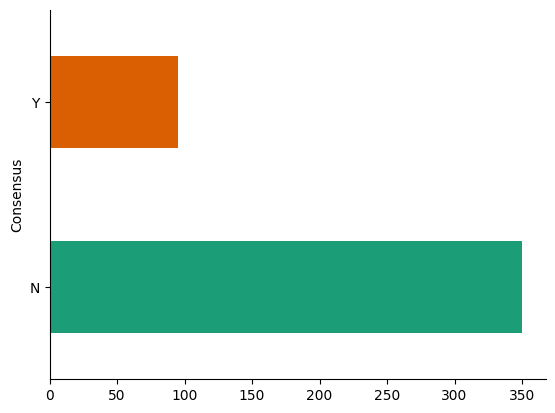

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data_con.groupby('Consensus').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Function to preprocess text
def preprocess_text(text):
    # Remove characters like << and >>
    text = re.sub(r'<<[^<>]+>>', '', text)
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.lower())
    return text



In [ ]:
data_con['Chief Complaint'] = data_con['Chief Complaint'].apply(preprocess_text)

from typing_extensions import dataclass_transform
# Remove stopwords
stop_words = set(stopwords.words('english'))
data_con['Chief Complaint'] = data_con['Chief Complaint'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in stop_words)
)


<ipython-input-16-9cd961de4bb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_con['Chief Complaint'] = data_con['Chief Complaint'].apply(preprocess_text)
<ipython-input-16-9cd961de4bb6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_con['Chief Complaint'] = data_con['Chief Complaint'].apply(


In [ ]:
# Apply lemmatization to the 'Chief Complaint' column
data_con['Chief Complaint'] = data_con['Chief Complaint'].apply(lemmatize_text)

<ipython-input-23-fb68b3a26f9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_con['Chief Complaint'] = data_con['Chief Complaint'].apply(lemmatize_text)


In [ ]:
# applying tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data_con['Chief Complaint'])

# Create DataFrame for TF-IDF
tfidf_df_con = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=data_con.index)

In [ ]:
# N-grams (bigrams) Vectorization
ngram_vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2))  # Considering bigrams
ngram_matrix = ngram_vectorizer.fit_transform(data_con['Chief Complaint'])

# Create a DataFrame for N-grams representation
ngram_df_con = pd.DataFrame(ngram_matrix.toarray(), columns=ngram_vectorizer.get_feature_names_out())
ngram_df_con = pd.concat([data_con[['Predict', 'Consensus']], ngram_df_con], axis=1)

In [ ]:
X = tfidf_df_con
y = data_con['Consensus']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)




# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_pred = nb_classifier.predict(X_test)


In [ ]:
# Evaluation metrics for Random Forest Classifier
print("Random Forest Classifier Metrics:")
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='binary', pos_label='Y')
rf_recall = recall_score(y_test, rf_pred, average='binary', pos_label='Y')
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")

# Evaluation metrics for Naive Bayes Classifier
print("\nNaive Bayes Classifier Metrics:")
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred, average='binary', pos_label='Y')
nb_recall = recall_score(y_test, nb_pred, average='binary', pos_label='Y')
print(f"Accuracy: {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")

# Classification report for Random Forest Classifier
print("\nClassification Report - Random Forest Classifier:")
print(classification_report(y_test, rf_pred))

# Classification report for Naive Bayes Classifier
print("\nClassification Report - Naive Bayes Classifier:")
print(classification_report(y_test, nb_pred))

Random Forest Classifier Metrics:
Accuracy: 0.7640
Precision: 1.0000
Recall: 0.1600

Naive Bayes Classifier Metrics:
Accuracy: 0.7191
Precision: 0.0000
Recall: 0.0000

Classification Report - Random Forest Classifier:
              precision    recall  f1-score   support

           N       0.75      1.00      0.86        64
           Y       1.00      0.16      0.28        25

    accuracy                           0.76        89
   macro avg       0.88      0.58      0.57        89
weighted avg       0.82      0.76      0.70        89


Classification Report - Naive Bayes Classifier:
              precision    recall  f1-score   support

           N       0.72      1.00      0.84        64
           Y       0.00      0.00      0.00        25

    accuracy                           0.72        89
   macro avg       0.36      0.50      0.42        89
weighted avg       0.52      0.72      0.60        89



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

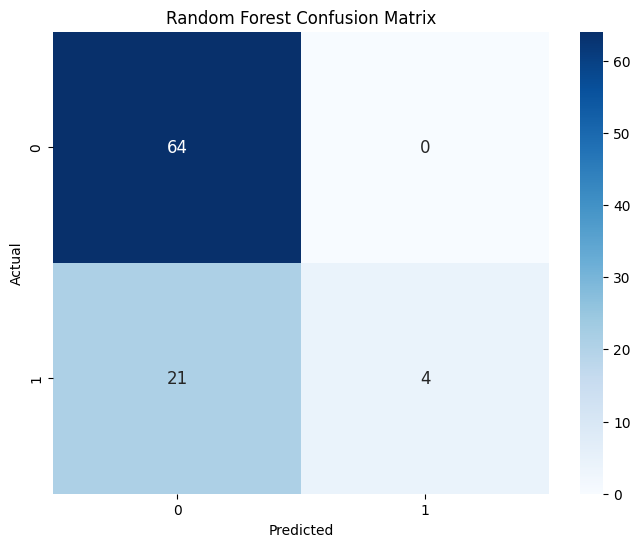

In [ ]:
# Generate confusion matrix for Random Forest Classifier

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

# Plot confusion matrix for Random Forest Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

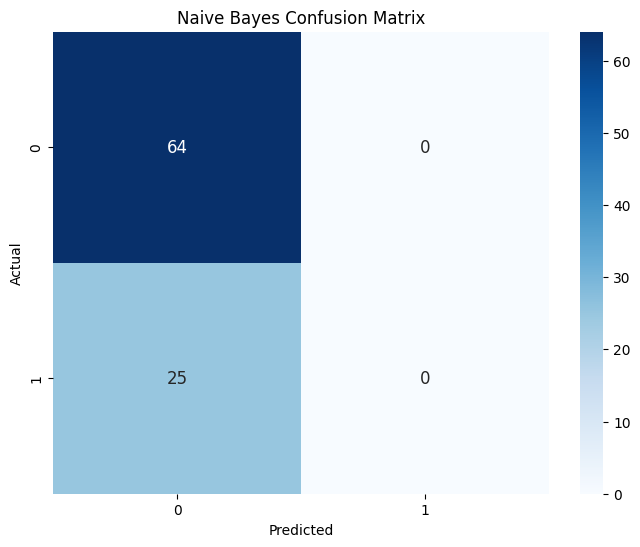

In [ ]:
# Generate confusion matrix for Naive Bayes Classifier
nb_conf_matrix = confusion_matrix(y_test, nb_pred)

# Plot confusion matrix for Naive Bayes Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

<ipython-input-31-496281d98225>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_con['Consensus'] = label_encoder.fit_transform(data_con['Consensus'])


Epoch 1/10
10/10 [==============================] - 2s 31ms/step - loss: 0.6702 - accuracy: 0.7188 - val_loss: 0.6293 - val_accuracy: 0.8611
Epoch 2/10
10/10 [==============================] - 0s 8ms/step - loss: 0.6105 - accuracy: 0.7969 - val_loss: 0.5499 - val_accuracy: 0.8611
Epoch 3/10
10/10 [==============================] - 0s 10ms/step - loss: 0.5310 - accuracy: 0.7969 - val_loss: 0.4694 - val_accuracy: 0.8611
Epoch 4/10
10/10 [==============================] - 0s 11ms/step - loss: 0.4654 - accuracy: 0.7969 - val_loss: 0.4151 - val_accuracy: 0.8611
Epoch 5/10
10/10 [==============================] - 0s 10ms/step - loss: 0.4167 - accuracy: 0.7969 - val_loss: 0.3927 - val_accuracy: 0.8611
Epoch 6/10
10/10 [==============================] - 0s 11ms/step - loss: 0.3829 - accuracy: 0.7969 - val_loss: 0.3820 - val_accuracy: 0.8611
Epoch 7/10
10/10 [==============================] - 0s 10ms/step - loss: 0.3212 - accuracy: 0.7969 - val_loss: 0.3726 - val_accuracy: 0.8611
Epoch 8/10
10/

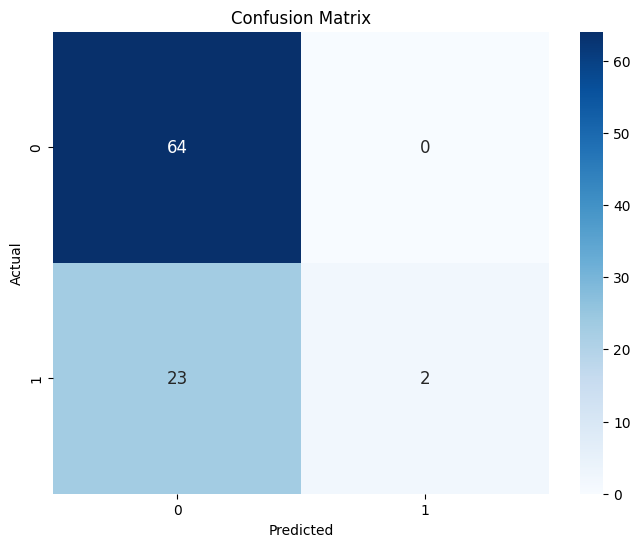

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



# Encode 'Consensus' column to numerical values (0 for 'N', 1 for 'Y')
label_encoder = LabelEncoder()
data_con['Consensus'] = label_encoder.fit_transform(data_con['Consensus'])


X = tfidf_df_con
y = data_con['Consensus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert TF-IDF matrices to numpy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Define a simple neural network model using Keras
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Thresholding probabilities to obtain classes

# Calculate evaluation metrics - accuracy, precision, recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
ngram_df_con

ngram_df_con.dropna(inplace=True)


Epoch 1/10
5/5 [==============================] - 1s 51ms/step - loss: 0.6745 - accuracy: 0.6463 - val_loss: 0.6651 - val_accuracy: 0.7647
Epoch 2/10
5/5 [==============================] - 0s 16ms/step - loss: 0.6346 - accuracy: 0.6871 - val_loss: 0.6456 - val_accuracy: 0.7647
Epoch 3/10
5/5 [==============================] - 0s 16ms/step - loss: 0.5833 - accuracy: 0.6939 - val_loss: 0.6265 - val_accuracy: 0.7647
Epoch 4/10
5/5 [==============================] - 0s 16ms/step - loss: 0.5309 - accuracy: 0.6939 - val_loss: 0.6100 - val_accuracy: 0.7647
Epoch 5/10
5/5 [==============================] - 0s 16ms/step - loss: 0.4750 - accuracy: 0.7143 - val_loss: 0.5969 - val_accuracy: 0.7647
Epoch 6/10
5/5 [==============================] - 0s 16ms/step - loss: 0.4176 - accuracy: 0.7619 - val_loss: 0.5911 - val_accuracy: 0.7647
Epoch 7/10
5/5 [==============================] - 0s 15ms/step - loss: 0.3592 - accuracy: 0.8163 - val_loss: 0.5916 - val_accuracy: 0.7647
Epoch 8/10
5/5 [===========

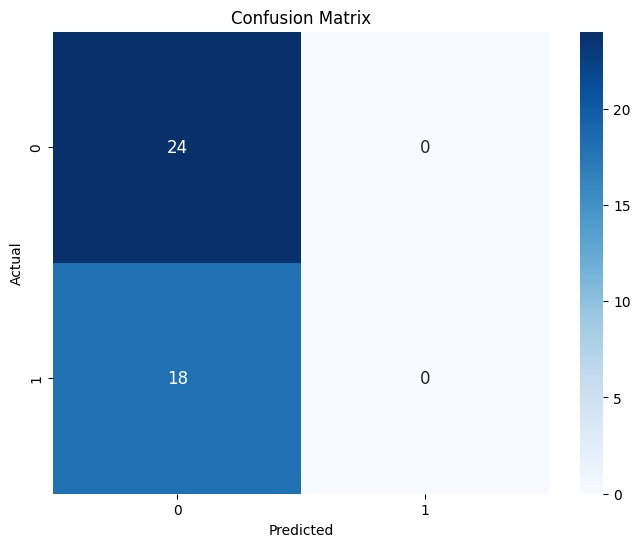

In [ ]:

# Encode 'Consensus' column to numerical values (0 for 'N', 1 for 'Y')
label_encoder = LabelEncoder()
ngram_df_con['Consensus'] = label_encoder.fit_transform(ngram_df_con['Consensus'])

# Define features (TF-IDF matrix) and target (Predict column)
X = ngram_df_con.drop(['Predict', 'Consensus'], axis=1)
y = ngram_df_con['Consensus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert TF-IDF matrices to numpy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Define a simple neural network model using Keras
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Thresholding probabilities to obtain classes



# Calculate evaluation metrics - accuracy, precision, recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')  # Use 'micro' average for multi-class
recall = recall_score(y_test, y_pred, average='micro')  # Use 'micro' average for multi-class


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# balancing the data

In [ ]:
tfidf_df

,0008,0017,0018,0028,0034,0036,0042,0049,0056,0058,...,zofran,zoloft,zoned,zpac,zpack,zpak,zquil,zyprexa,zyrtec,zyrtecd
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from imblearn.over_sampling import SMOTE


# Separate features and target variable
X = tfidf_df
y = data['Predict']

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Reconstruct DataFrame with resampled data
resampled_df = pd.concat([X_resampled, y_resampled], axis=1)

# Check the balance after resampling
print(resampled_df['Predict'].value_counts())


N    8168
Y    8168
Name: Predict, dtype: int64


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)




# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_pred = nb_classifier.predict(X_test)


In [ ]:
# Evaluation metrics for Random Forest Classifier
print("Random Forest Classifier Metrics:")
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='binary', pos_label='Y')
rf_recall = recall_score(y_test, rf_pred, average='binary', pos_label='Y')
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")

# Evaluation metrics for Naive Bayes Classifier
print("\nNaive Bayes Classifier Metrics:")
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred, average='binary', pos_label='Y')
nb_recall = recall_score(y_test, nb_pred, average='binary', pos_label='Y')
print(f"Accuracy: {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")

# Classification report for Random Forest Classifier
print("\nClassification Report - Random Forest Classifier:")
print(classification_report(y_test, rf_pred))

# Classification report for Naive Bayes Classifier
print("\nClassification Report - Naive Bayes Classifier:")
print(classification_report(y_test, nb_pred))

Random Forest Classifier Metrics:
Accuracy: 0.9855
Precision: 0.0000
Recall: 0.0000

Naive Bayes Classifier Metrics:
Accuracy: 0.9855
Precision: 0.0000
Recall: 0.0000

Classification Report - Random Forest Classifier:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           N       0.99      1.00      0.99      1632
           Y       0.00      0.00      0.00        24

    accuracy                           0.99      1656
   macro avg       0.49      0.50      0.50      1656
weighted avg       0.97      0.99      0.98      1656


Classification Report - Naive Bayes Classifier:
              precision    recall  f1-score   support

           N       0.99      1.00      0.99      1632
           Y       0.00      0.00      0.00        24

    accuracy                           0.99      1656
   macro avg       0.49      0.50      0.50      1656
weighted avg       0.97      0.99      0.98      1656



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

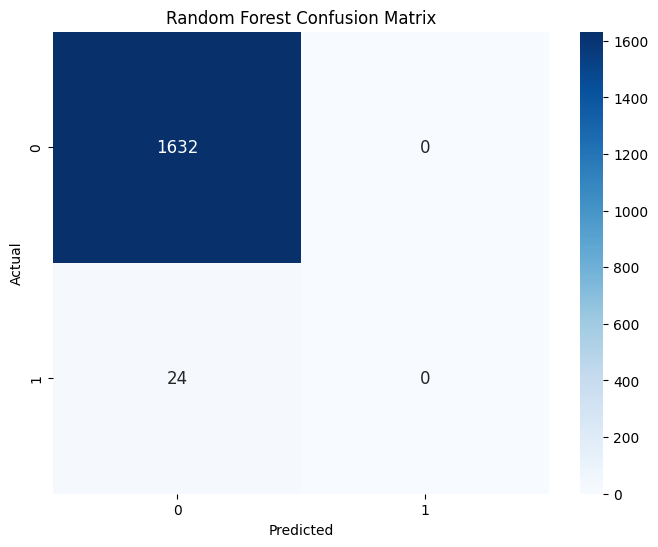

In [ ]:
# Generate confusion matrix for Random Forest Classifier

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

# Plot confusion matrix for Random Forest Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# using dataset after feature engineering

In [51]:
# cleaning the data
df = df[df['Predict'].isin(['Y', 'N'])]


In [52]:
from typing_extensions import dataclass_transform
# Remove stopwords
stop_words = set(stopwords.words('english'))
df['Chief Complaint'] = df['Chief Complaint'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in stop_words)
)

In [53]:
# Tokenize text and apply lemmatization
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(lemmatized_tokens)


In [54]:
# Apply lemmatization to the 'Chief Complaint' column
df['Chief Complaint'] = df['Chief Complaint'].apply(lemmatize_text)

In [55]:
# applying tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Chief Complaint'])

# Create DataFrame for TF-IDF
vector_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=df.index)

In [56]:
df_vector=pd.concat([vector_df,df],axis=1)

In [57]:
df_vector.drop(['Chief Complaint','Consensus'], axis=1, inplace=True)


In [58]:
df_vector

,00,0008,0017,0018,0028,0034,0036,0042,0049,0056,...,Predict,Text_Length,Special_Char_Count,Word_Count,Avg_Word_Length,Has_Gout_Term,Has_Dehydration_Term,Capitalization_Ratio,Numerical_Digits_Count,Sentence_Count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,N,122,9,23,4.347826,1,0,0.122951,2,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Y,216,25,33,5.575758,1,0,0.106481,1,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Y,152,8,26,4.884615,1,1,0.032895,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Y,61,3,13,3.769231,1,0,0.016393,1,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,N,131,12,22,5.000000,1,0,0.068702,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,N,92,3,17,4.411765,0,0,0.010870,0,3
8433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,N,55,5,10,4.600000,0,0,0.054545,0,3
8434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,N,104,4,22,3.772727,0,0,0.048077,0,2
8435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,N,35,1,7,4.142857,0,0,0.142857,1,2


In [59]:
# Split the data into training and testing sets
X = df_vector.drop(['Predict'], axis=1)
y = df_vector['Predict']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

In [60]:

# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_pred = nb_classifier.predict(X_test)

In [61]:
# Evaluation metrics for Random Forest Classifier
print("Random Forest Classifier Metrics:")
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='binary', pos_label='Y')
rf_recall = recall_score(y_test, rf_pred, average='binary', pos_label='Y')
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")

# Evaluation metrics for Naive Bayes Classifier
print("\nNaive Bayes Classifier Metrics:")
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred, average='binary', pos_label='Y')
nb_recall = recall_score(y_test, nb_pred, average='binary', pos_label='Y')
print(f"Accuracy: {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")

# Classification report for Random Forest Classifier
print("\nClassification Report - Random Forest Classifier:")
print(classification_report(y_test, rf_pred))

# Classification report for Naive Bayes Classifier
print("\nClassification Report - Naive Bayes Classifier:")
print(classification_report(y_test, nb_pred))

Random Forest Classifier Metrics:
Accuracy: 0.9873
Precision: 1.0000
Recall: 0.1250

Naive Bayes Classifier Metrics:
Accuracy: 0.9855
Precision: 0.0000
Recall: 0.0000

Classification Report - Random Forest Classifier:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           N       0.99      1.00      0.99      1632
           Y       1.00      0.12      0.22        24

    accuracy                           0.99      1656
   macro avg       0.99      0.56      0.61      1656
weighted avg       0.99      0.99      0.98      1656


Classification Report - Naive Bayes Classifier:
              precision    recall  f1-score   support

           N       0.99      1.00      0.99      1632
           Y       0.00      0.00      0.00        24

    accuracy                           0.99      1656
   macro avg       0.49      0.50      0.50      1656
weighted avg       0.97      0.99      0.98      1656



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


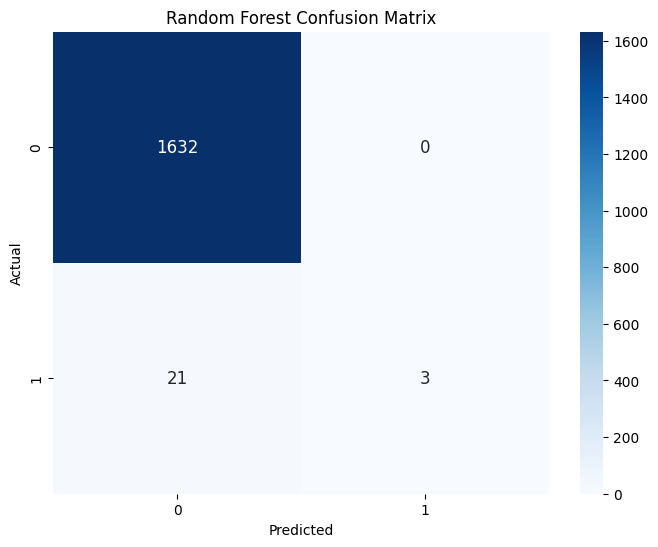

In [62]:
# Generate confusion matrix for Random Forest Classifier

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

# Plot confusion matrix for Random Forest Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [76]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Encode 'Predict' column to numerical values (0 for 'N', 1 for 'Y')
label_encoder = LabelEncoder()
df_vector['Predict'] = label_encoder.fit_transform(df_vector['Predict'])

# Define features (TF-IDF matrix) and target (Predict column)
X = df_vector.drop(['Predict'], axis=1)
y = df_vector['Predict']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert TF-IDF matrices to numpy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Define a simple neural network model using Keras
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)



Epoch 1/20
187/187 [==============================] - 5s 19ms/step - loss: 0.0964 - accuracy: 0.9851 - val_loss: 0.0725 - val_accuracy: 0.9879
Epoch 2/20
187/187 [==============================] - 3s 17ms/step - loss: 0.0719 - accuracy: 0.9867 - val_loss: 0.0445 - val_accuracy: 0.9879
Epoch 3/20
187/187 [==============================] - 3s 17ms/step - loss: 0.0405 - accuracy: 0.9867 - val_loss: 0.0261 - val_accuracy: 0.9879
Epoch 4/20
187/187 [==============================] - 3s 18ms/step - loss: 0.0279 - accuracy: 0.9893 - val_loss: 0.0254 - val_accuracy: 0.9879
Epoch 5/20
187/187 [==============================] - 3s 18ms/step - loss: 0.0222 - accuracy: 0.9914 - val_loss: 0.0141 - val_accuracy: 0.9940
Epoch 6/20
187/187 [==============================] - 3s 14ms/step - loss: 0.0191 - accuracy: 0.9923 - val_loss: 0.0310 - val_accuracy: 0.9925
Epoch 7/20
187/187 [==============================] - 3s 15ms/step - loss: 0.0167 - accuracy: 0.9950 - val_loss: 0.0153 - val_accuracy: 0.9925

In [77]:
# Evaluate the model on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Thresholding probabilities to obtain classes

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

52/52 [==============================] - 0s 4ms/step
Accuracy: 0.9940
Precision: 0.8500
Recall: 0.7083


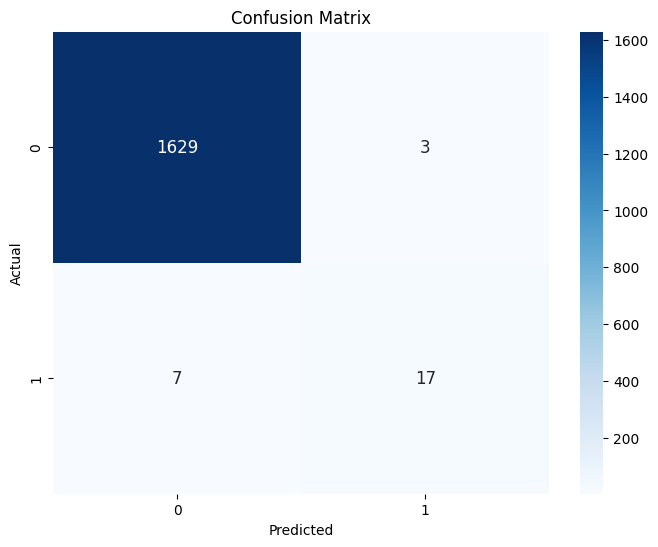

In [78]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# using svm and gbm classifiers

In [71]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix



# Initialize and train the SVM model
svm_classifier = SVC(kernel='rbf', random_state=42)  # You can adjust kernel and other parameters
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)

# Print evaluation metrics
print(f"SVM - Accuracy: {accuracy_svm:.4f}, Precision: {precision_svm:.4f}, Recall: {recall_svm:.4f}")


SVM - Accuracy: 0.9855, Precision: 0.0000, Recall: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


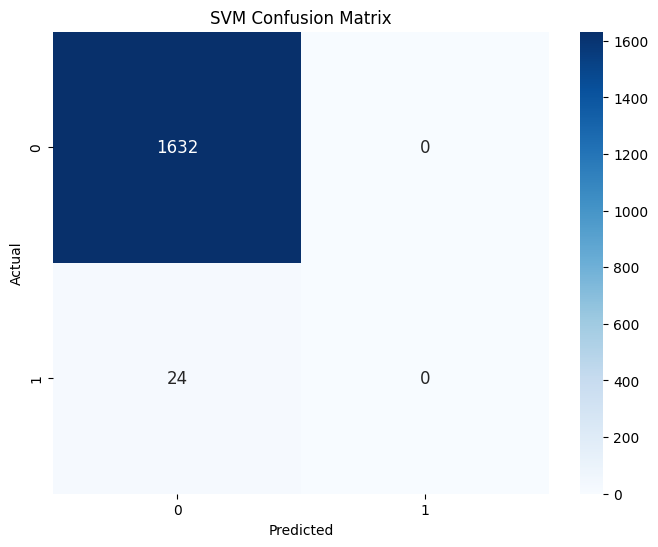

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()


In [72]:
# Define features (TF-IDF matrix) and target (Predict column)
X = df_vector.drop(['Predict'], axis=1)
y = df_vector['Predict']



from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Assuming X and y are your features and target respectively

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the GBM model
gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)  # You can adjust other parameters
gbm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_gbm = gbm_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm)
recall_gbm = recall_score(y_test, y_pred_gbm)

# Print evaluation metrics
print(f"GBM - Accuracy: {accuracy_gbm:.4f}, Precision: {precision_gbm:.4f}, Recall: {recall_gbm:.4f}")


GBM - Accuracy: 0.9903, Precision: 0.7222, Recall: 0.5417


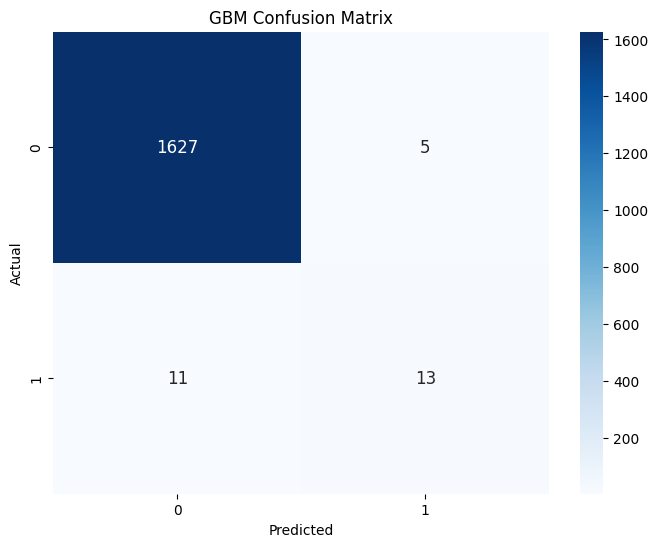

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix for GBM
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)

# Plot confusion matrix for GBM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('GBM Confusion Matrix')
plt.show()



# Data Visualization

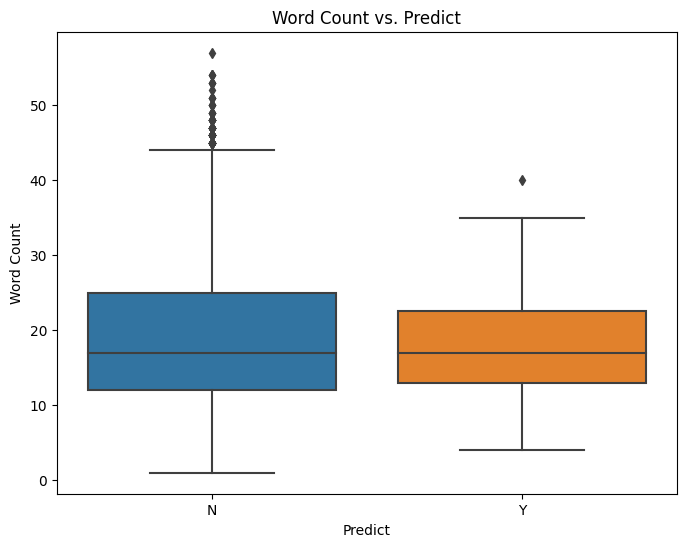

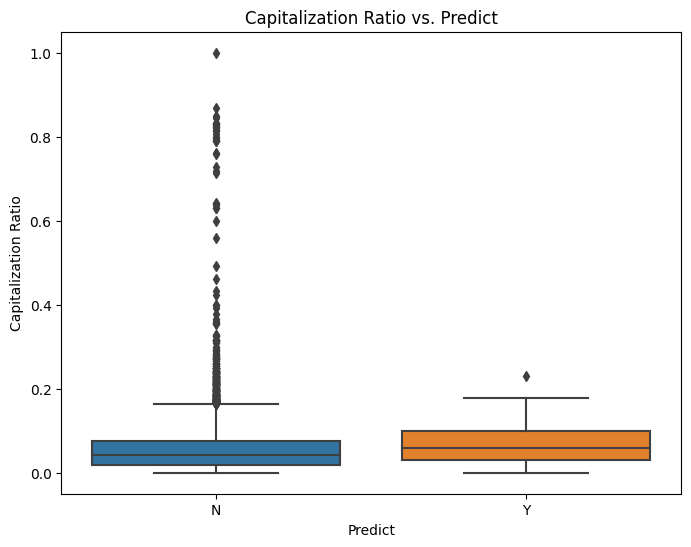

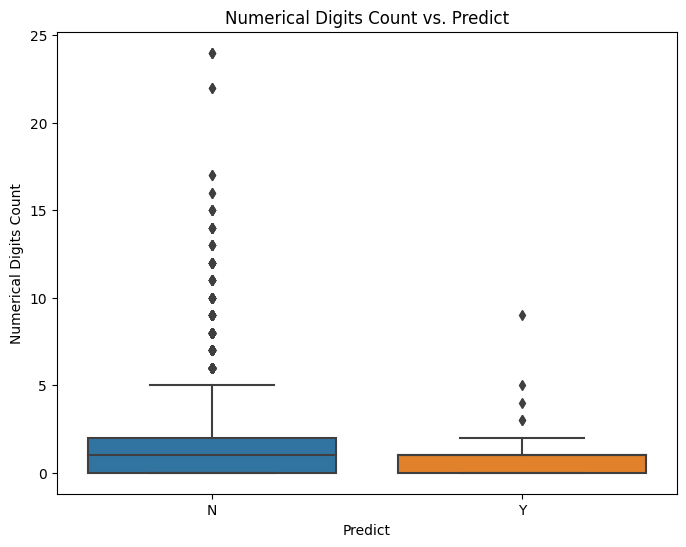

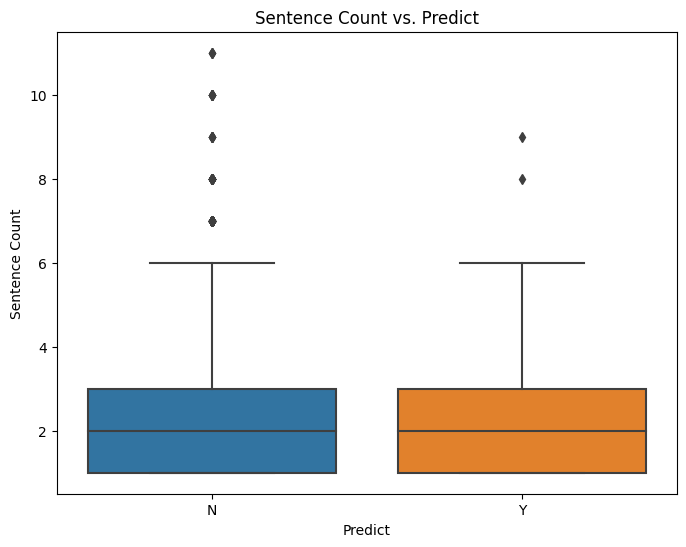

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing Word Count vs. Predict
plt.figure(figsize=(8, 6))
sns.boxplot(x='Predict', y='Word_Count', data=df)
plt.title('Word Count vs. Predict')
plt.xlabel('Predict')
plt.ylabel('Word Count')
plt.show()

# Visualizing Capitalization Ratio vs. Predict
plt.figure(figsize=(8, 6))
sns.boxplot(x='Predict', y='Capitalization_Ratio', data=df)
plt.title('Capitalization Ratio vs. Predict')
plt.xlabel('Predict')
plt.ylabel('Capitalization Ratio')
plt.show()

# Visualizing Numerical Digits Count vs. Predict
plt.figure(figsize=(8, 6))
sns.boxplot(x='Predict', y='Numerical_Digits_Count', data=df)
plt.title('Numerical Digits Count vs. Predict')
plt.xlabel('Predict')
plt.ylabel('Numerical Digits Count')
plt.show()

# Visualizing Sentence Count vs. Predict
plt.figure(figsize=(8, 6))
sns.boxplot(x='Predict', y='Sentence_Count', data=df)
plt.title('Sentence Count vs. Predict')
plt.xlabel('Predict')
plt.ylabel('Sentence Count')
plt.show()


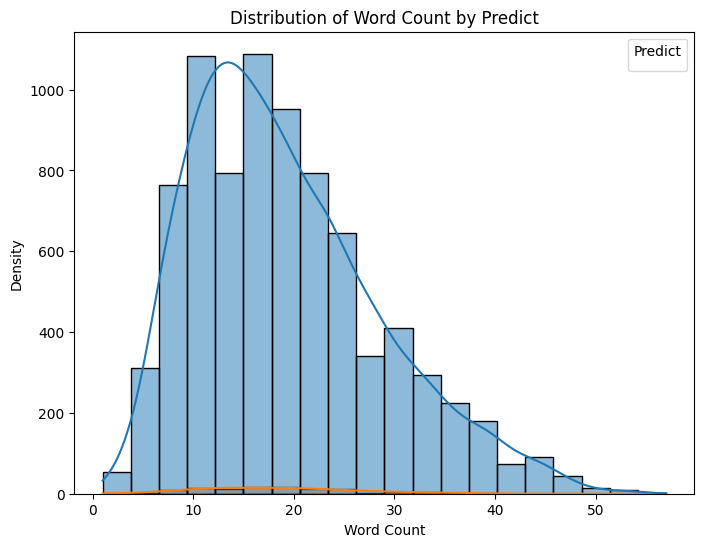

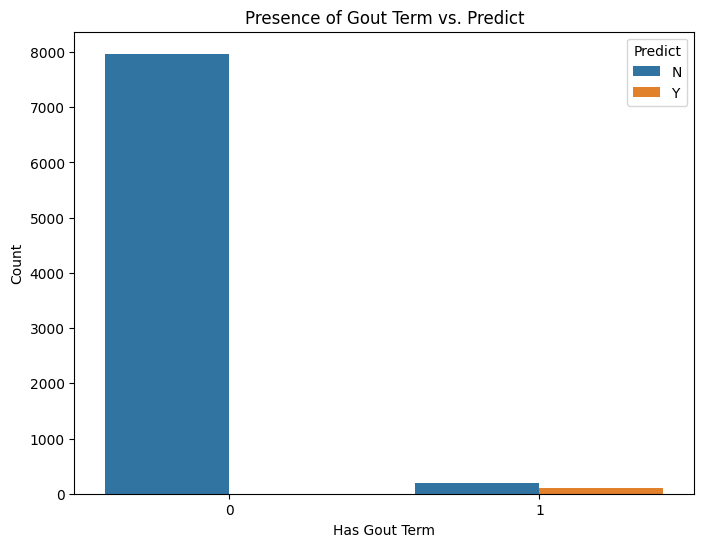

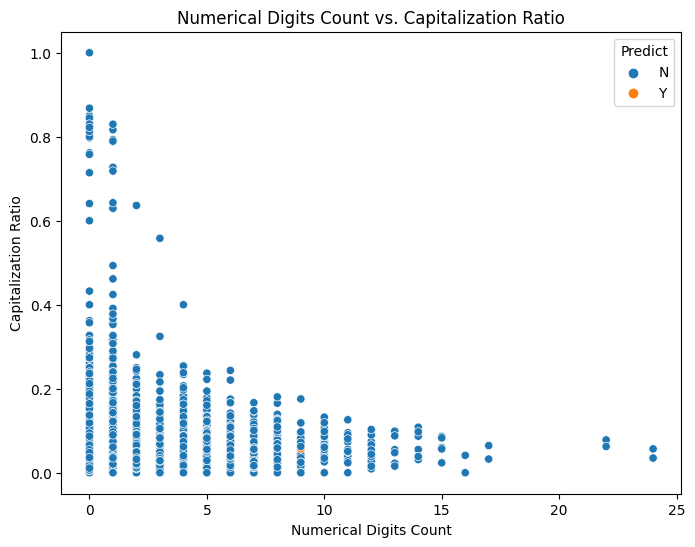

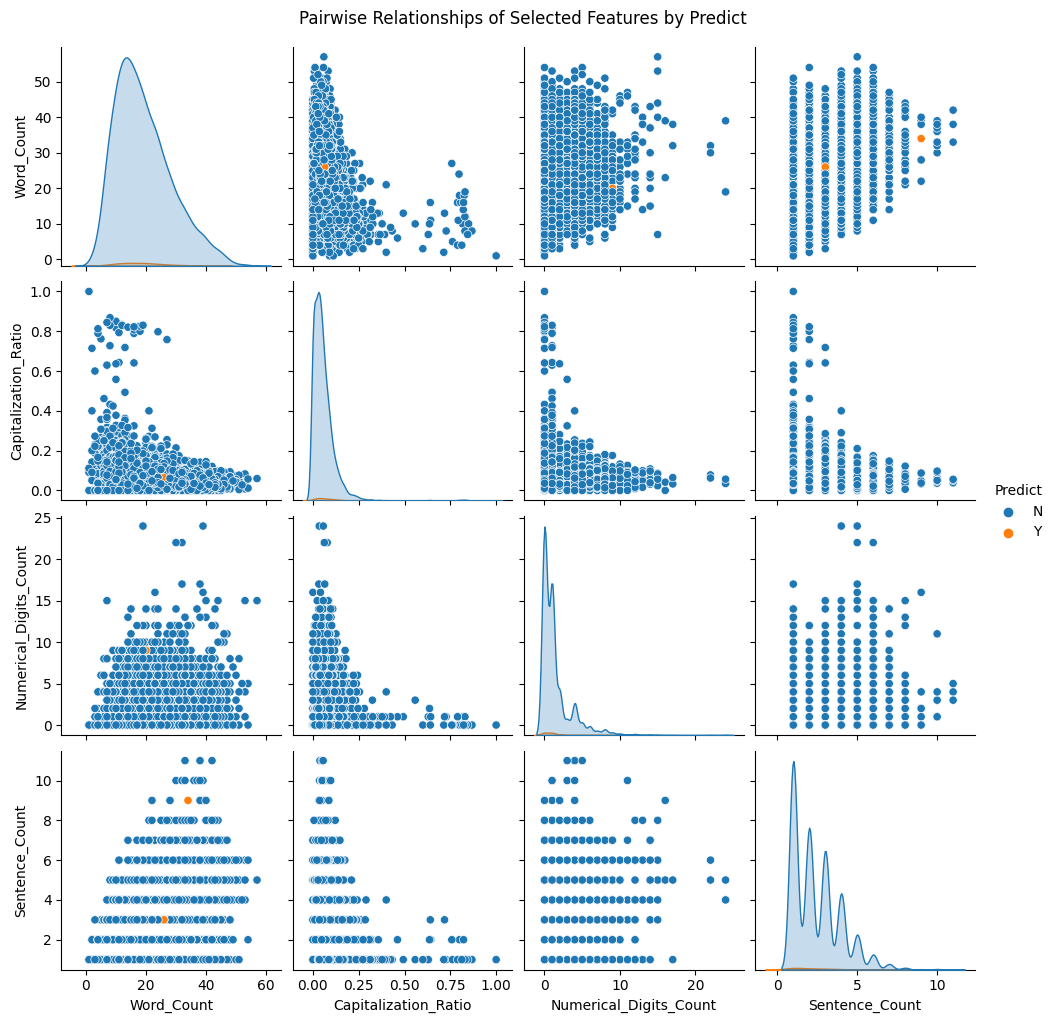

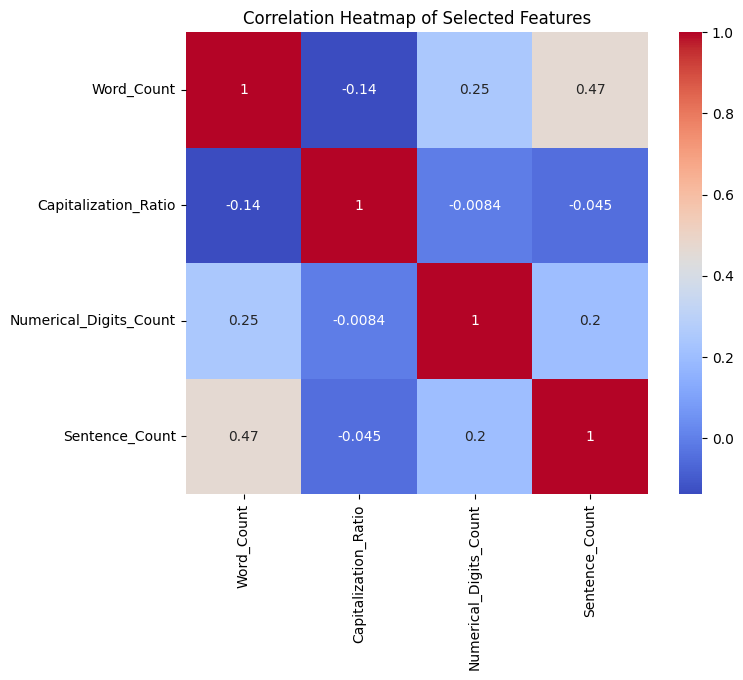

In [91]:
# Histograms or Density Plots for Word Count
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Word_Count', hue='Predict', kde=True, bins=20)
plt.title('Distribution of Word Count by Predict')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.legend(title='Predict')
plt.show()

# Bar Plot for Has_Gout_Term
plt.figure(figsize=(8, 6))
sns.countplot(x='Has_Gout_Term', hue='Predict', data=df)
plt.title('Presence of Gout Term vs. Predict')
plt.xlabel('Has Gout Term')
plt.ylabel('Count')
plt.legend(title='Predict')
plt.show()

# Scatter Plot for Numerical Digits Count vs. Capitalization Ratio
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Numerical_Digits_Count', y='Capitalization_Ratio', hue='Predict', data=df)
plt.title('Numerical Digits Count vs. Capitalization Ratio')
plt.xlabel('Numerical Digits Count')
plt.ylabel('Capitalization Ratio')
plt.legend(title='Predict')
plt.show()

# Pairplot for selected features
selected_features = ['Word_Count', 'Capitalization_Ratio', 'Numerical_Digits_Count', 'Sentence_Count']
sns.pairplot(df, vars=selected_features, hue='Predict')
plt.suptitle('Pairwise Relationships of Selected Features by Predict', y=1.02)
plt.show()

# Heatmap for correlations between features
correlation_matrix = df[selected_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Selected Features')
plt.show()
